In [15]:
import librosa
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np

def freq(data, sample_rate,start_time=0,end_time=5000):
    start_point = int(sample_rate * start_time / 1000)
    end_point = int(sample_rate * end_time / 1000)-1
    length = (end_time - start_time) / 1000
    counter = 0
    for i in range(start_point, end_point):
        if data[i] < 0 and data[i+1] > 0:
            counter += 1
    return counter/length

In [16]:
train_wav_dir = 'train/train/'
train_label = 'train/meta_train.csv'

In [17]:
files = os.listdir(train_wav_dir)
files.sort()
freq_list = []
for f in tqdm(files[::10]):
    data ,sample_rate = librosa.load(train_wav_dir+f,sr=16000)
    data_freq = freq(data,sample_rate)
    freq_list.append(data_freq)

100%|██████████| 120/120 [00:39<00:00,  3.02it/s]


In [4]:
df = pd.read_csv(train_label)[::10]
df['audio_freq'] = freq_list
df

,Filename,Label,Remark,audio_freq
0,train_00001,0,Barking,113.8
10,train_00011,0,Barking,403.0
20,train_00021,0,Barking,1680.2
30,train_00031,0,Barking,1633.6
40,train_00041,0,Barking,435.6
...,...,...,...,...
1150,train_01151,5,Dishes,1657.4
1160,train_01161,5,Dishes,1478.4
1170,train_01171,5,Dishes,1311.8
1180,train_01181,5,Dishes,1745.8


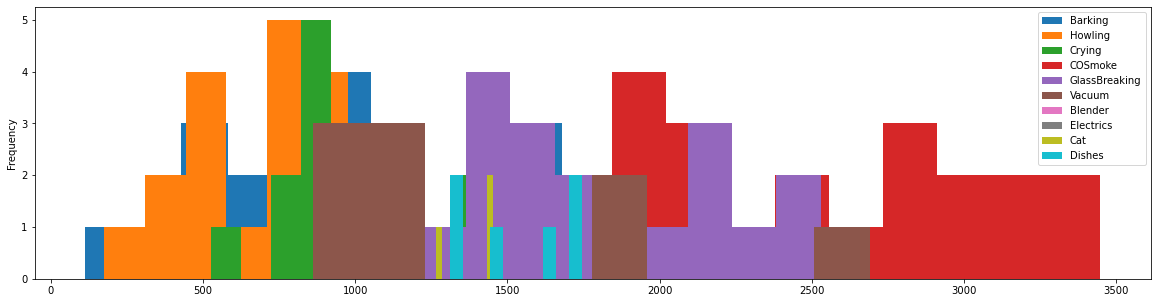

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for r in df.Remark.unique():
    df[df.Remark==r]['audio_freq'].plot(kind='hist',label=r)
plt.legend()
plt.show()

In [14]:
for r in df.Remark.unique():
    r_max = df[df.Remark==r].audio_freq.max()
    r_min = df[df.Remark==r].audio_freq.min()
    print(r,r_min,r_max)

Barking 113.8 1680.2
Howling 176.8 1507.8
Crying 525.0 1513.6
COSmoke 1665.0 3445.6
GlassBreaking 1219.2 2673.8
Vacuum 862.2 2691.0
Blender 1096.0 1096.0
Electrics 1748.0 1748.0
Cat 1265.0 1452.8
Dishes 1311.8 1745.8
